In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Load the images
image = cv2.imread('../datasets/niab/EXP01/Top_Images/Masked_Dataset/imgs/Exp01_Block01_Image01_Pot001.jpg', cv2.IMREAD_COLOR)

In [153]:
# Resize the image
scale_percent = 10 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (345, 460, 3)


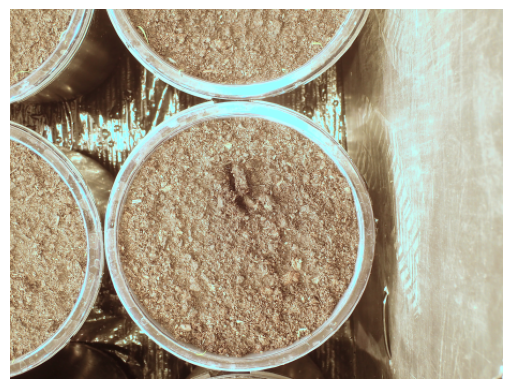

In [154]:
# Plot the images from cv2 in matplotlib
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

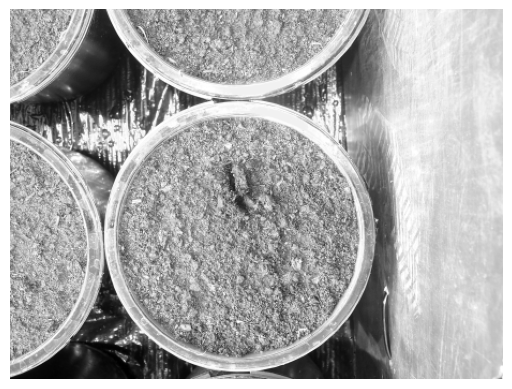

In [155]:
#  Hough Circle Transform to detect plant pot rim
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 5)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

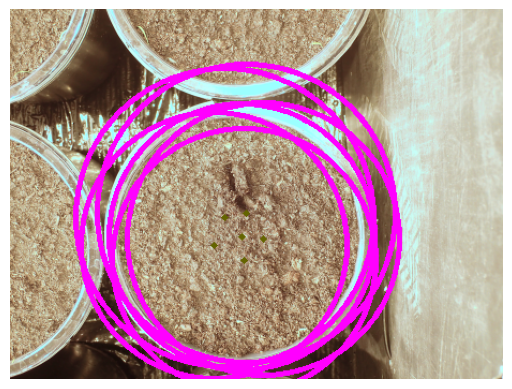

In [156]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 50, param1=50, param2=30, minRadius=120, maxRadius=140)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(resized, center, 1, (0, 100, 100), 3)
        radius = i[2]
        cv2.circle(resized, center, radius, (255, 0, 255), 3)

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()